In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base 
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")


In [6]:
# Declare a Base using `automap_base()`

# Use the Base class to reflect the database tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement =  Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
recent_date   

('2017-08-23',)

<Axes: xlabel='date'>

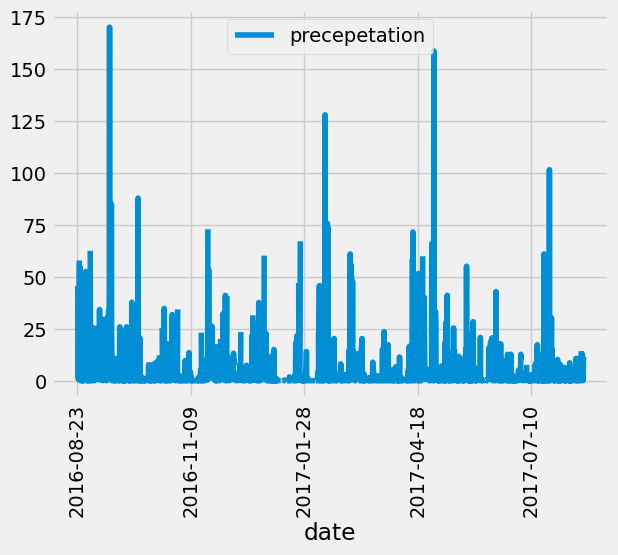

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
precepetation_data = session.query(Measurement.date,Measurement.prcp)
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=366)
# Perform a query to retrieve the data and precipitation scores
year_precepetation_data = session.query(Measurement.prcp,Measurement.date).\
    filter(Measurement.date > year_ago).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prec_db = pd.DataFrame(year_precepetation_data,columns=['precepetation','date'])
# Sort the dataframe by date
db=prec_db.sort_values(by=['date'],axis=0)
# Use Pandas Plotting with Matplotlib to plot the dat
db.plot('date','precepetation',rot=90)


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_db.describe()

,precepetation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).distinct().count()

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations=session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').all()
temperature


[(12.2, 29.4, 22.03582251082252)]

Text(0, 0.5, 'Frequency')

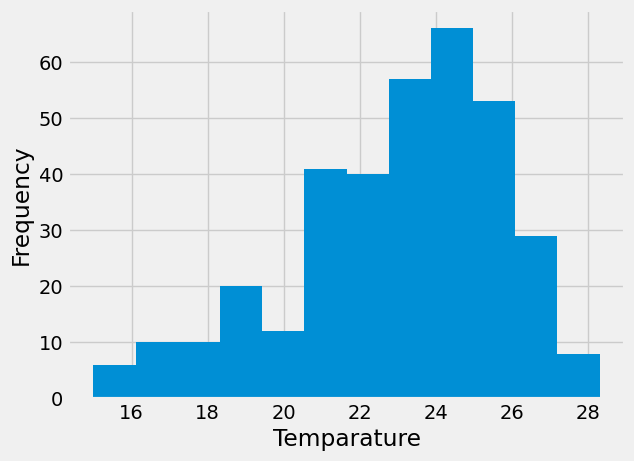

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=366)
year_tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.date > year_ago).filter(Measurement.station=='USC00519281').all()
tobs_df=pd.DataFrame(year_tobs_data,columns=['tobs'])
tobs_df['tobs'].hist(bins=12)
plt.xlabel('Temparature')
plt.ylabel('Frequency')

# Close Session

In [17]:
# Close Session
session.close()
